# Data segmentation and augmentation
* Use labeled cough locations and non-cough recordings to create a dataset of coughs and non-coughs (laughing, breathing, and throat clearing) to train ML/DL algorithms
* Select a variable data window length 
* Augment the dataset a variable number of times by randomly shifting the signal within the window

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import sys
import IPython.display as ipd
from enum import Enum
sys.path.append(os.path.abspath('../src'))
from helpers import *
from dataset_gen import *

In [2]:
data_folder = '../../data/public_dataset/' #Location of public dataset in your file directory
subj_ids = os.listdir(data_folder)
print("There are {0} subjects".format(len(subj_ids)))

There are 15 subjects


In [3]:
# Seed the random number generator for augmentation purposes
seed = 1
np.random.seed(seed)

In [4]:
# Example: generate dataset with a window length of 0.7 seconds augmented twice
audio_data, imu_data, labels, total_coughs = get_samples_for_subject(data_folder, subj_id="14287", window_len=0.7, aug_factor=2)

In [5]:
print("Audio data shape: {0}".format(audio_data.shape))
print("IMU data shape: {0}".format(imu_data.shape))
print("Labels shape: {0}".format(labels.shape))
print("Number of total coughs before augmentation: {0}".format(total_coughs))

Audio data shape: (2040, 11200, 2)
IMU data shape: (2040, 70, 6)
Labels shape: (2040,)
Number of total coughs before augmentation: 255


In [6]:
# Plot a sample signal of the outer microphone
n = 15
samp = audio_data[n,:,0]
plt.plot(samp)
ipd.Audio(samp, rate=FS_AUDIO, autoplay=True)

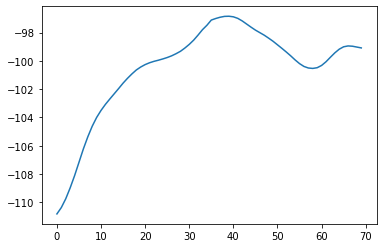

In [7]:
# Plot a sample signal of the negated z direction of the accelerometer
plt.plot(-imu_data[n,:,2])